* Decision Tree

In [9]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
from sklearn import datasets, tree, metrics, cross_validation
import pydotplus
from IPython.display import Image
from io import StringIO

In [10]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


変数重要度:  [0.02770873 0.03336965 0.04511017 0.89381145]


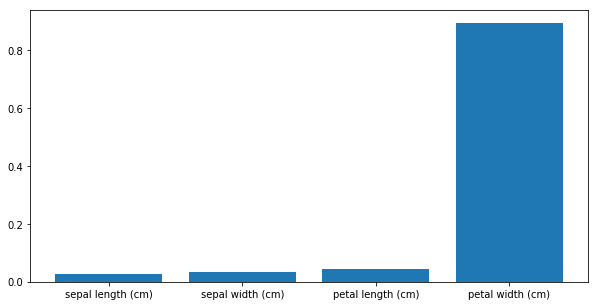

学習データ評価  ----------------------------------------------------------------------------------------------------
混合行列: 
[[37  0  0]
 [ 0 33  0]
 [ 0  0 35]]
正解率:  1.0

評価データ評価  ----------------------------------------------------------------------------------------------------
混合行列: 
[[13  0  0]
 [ 0 16  1]
 [ 0  2 13]]
正解率:  0.9333333333333333


In [15]:
data_y = df['target']
x_label = iris['feature_names'] # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data_x = df[x_label]
train_x, valid_x, train_y, valid_y = cross_validation.train_test_split(data_x, data_y, test_size=0.3)

model = tree.DecisionTreeClassifier()
model.fit(train_x, train_y)

# 変数重要度プロット
print("変数重要度: ", model.feature_importances_) # 変数重要度
left = list(range(1, len(x_label)+1))
height = model.feature_importances_
plt.figure(figsize=(10,5))
plt.bar(left, height, tick_label=x_label)
plt.show()

print('学習データ評価 ', '-'*100)
pred = model.predict(train_x)
print("混合行列: ")
print(metrics.confusion_matrix(train_y, pred)) # 混合行列
print("正解率: ", metrics.accuracy_score(train_y, pred))

print('')
print('評価データ評価 ', '-'*100)
pred = model.predict(valid_x)
print("混合行列: ")
print(metrics.confusion_matrix(valid_y, pred)) # 混合行列
print("正解率: ", metrics.accuracy_score(valid_y, pred))

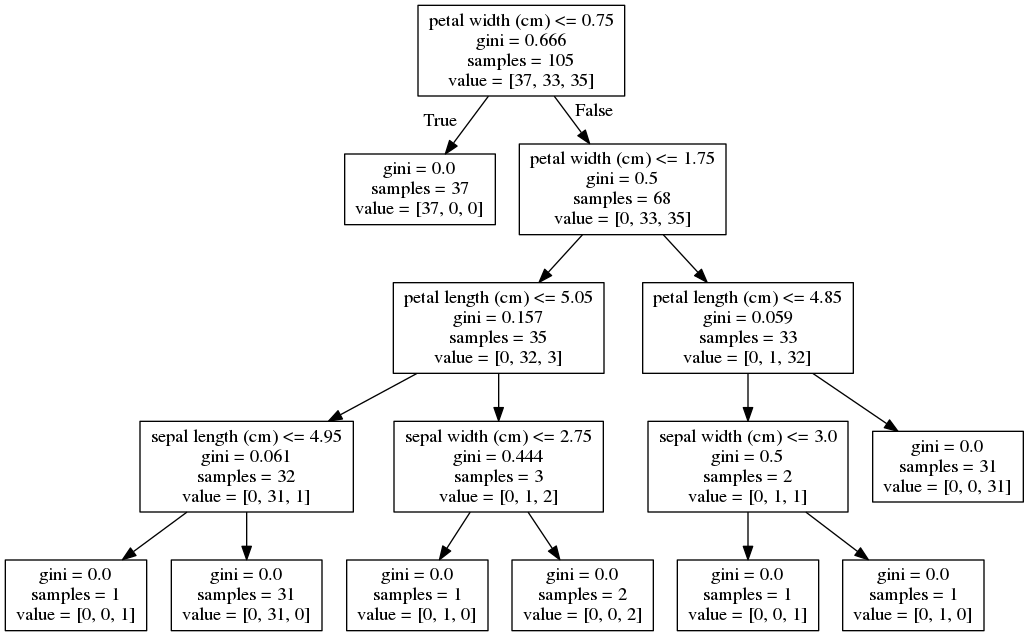

In [17]:
model = tree.DecisionTreeClassifier()
model.fit(train_x, train_y)
dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data, feature_names=x_label, max_depth=5)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('graph.pdf')
Image(graph.create_png())

In [18]:
!python --version

Python 3.6.6 :: Anaconda custom (64-bit)


In [19]:
!pip freeze

absl-py==0.2.2
alabaster==0.7.10
algopy==0.5.7
altair==2.1.0
anaconda-client==1.6.5
anaconda-navigator==1.6.9
anaconda-project==0.8.0
annoy==1.12.0
appdirs==1.4.3
arrow==0.12.1
asn1crypto==0.22.0
astor==0.7.1
astroid==1.5.3
astropy==2.0.2
attrs==18.1.0
audioread==2.1.6
Babel==2.5.0
backports.shutil-get-terminal-size==1.0.0
Baker==1.3
basemap==1.1.0
bayesian-optimization==0.6.0
bayespy==0.5.17
bcolz==1.2.1
beautifulsoup4==4.6.0
biopython==1.72
bitarray==0.8.1
bkcharts==0.2
blaze==0.11.3
bleach==1.5.0
blist==1.3.6
bokeh==0.13.0
Boruta==0.1.5
boto==2.48.0
boto3==1.7.54
botocore==1.10.54
Bottleneck==1.2.1
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb600a440f#egg=bq_helper
branca==0.3.0
bz2file==0.98
cachetools==2.1.0
cairocffi==0.8.1
CairoSVG==2.1.3
Cartopy==0.16.0
catboost==0.9.1.1
category-encoders==1.2.8
certifi==2018.4.16
cffi==1.10.0
chainer==4.2.0
chardet==3.0.4
click==6.7
click-plugins==1.0.3
cligj==0.4.0
cloudpickle==0.4.0
clyent==1.2.2
cmudi